In [24]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [25]:
import numpy as np
import PIL.Image
import time
import functools
from google.colab import files
from keras.preprocessing import image

In [26]:
#loading compressed models from tensorflow
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

In [27]:
#upload content image
uploaded = files.upload()
for key in uploaded.keys():
  content_image = key
print(content_image)

Saving DSC_0221.JPG to DSC_0221 (1).JPG
DSC_0221.JPG


In [28]:
#upload style image
uploaded = files.upload()
for key in uploaded.keys():
  style_image = key
print(style_image)

Saving style image1.png to style image1 (1).png
style image1.png


In [29]:
#tensor_to_image function allows a TensorFlow Tensor to be converted into an image file, representable as such
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [30]:
#load_img loads an image from the desired path
def load_img(path_to_img):
  max_dim = 1024
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [31]:
#imshow allows us to visualize an image, paying attention to the size of the input file
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

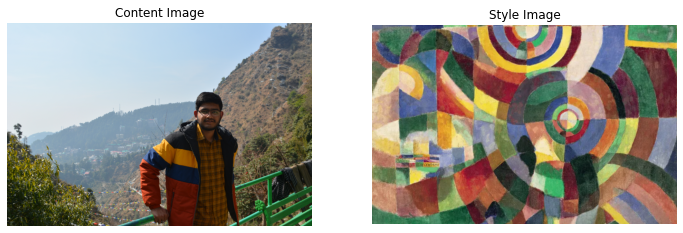

In [32]:
content_image = load_img(content_image)
style_image = load_img(style_image)

plt.subplot(1, 2, 1)
plt.axis('off')
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
plt.axis('off')
imshow(style_image, 'Style Image')

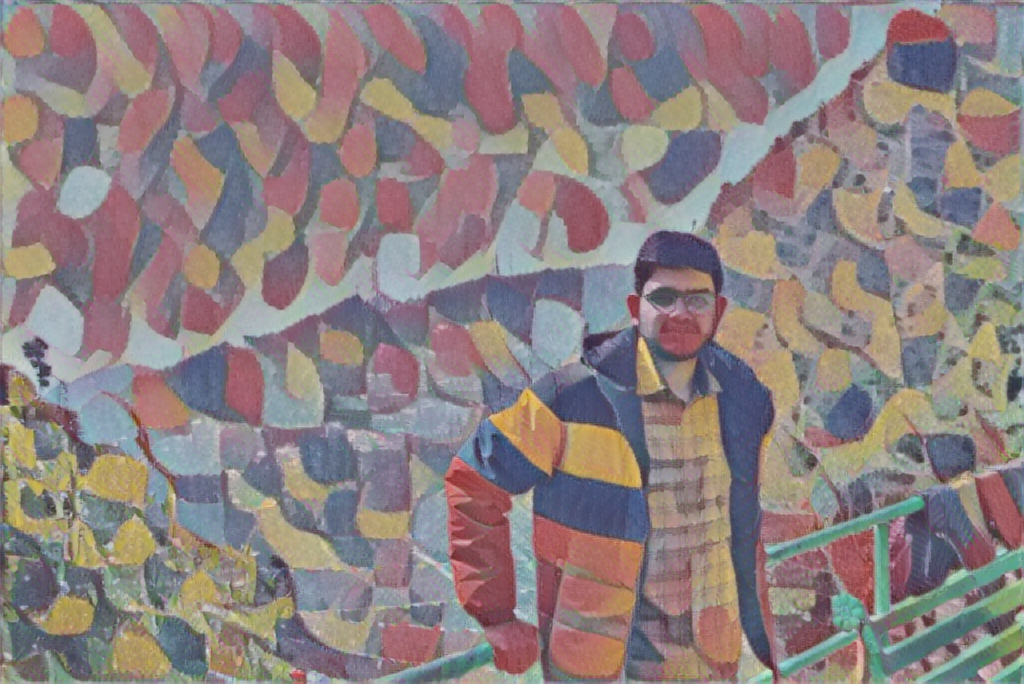

In [33]:
#now lets load the pre-trained model from tenserflow hub
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
#generate the new stylized image passing our two images to the model as constant Tensorflow tensors
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
image = tensor_to_image(stylized_image)
image

In [34]:
#name and download the new image
file_name = 'stylized-image.png'
image.save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>